# King County House Price Prediction using Linear Regression

This dataset contains house sale prices for King County, which includes Seattle.
It includes homes sold between May 2014 and May 2015.

Dataset can be found at [kaggle](https://www.kaggle.com/harlfoxem/housesalesprediction/) and contains 21k+ records.




**id**: Unique ID for each home sold  

**date**: Date of the home sale  

**price**: Price of each home sold  <-- target variable

**bedrooms**: Number of bedrooms  

**bathrooms**: Number of bathrooms, where .5 accounts for a room with a toilet but no shower  

**sqft_living**: Square footage of the apartments interior living space  

**sqft_lot**: Square footage of the land space  

**floors**: Number of floors  

**waterfront**: - A dummy variable for whether the apartment was overlooking the waterfront or not  

**view**: An index from 0 to 4 of how good the view of the property was  

**condition**: - An index from 1 to 5 on the condition of the apartment,  

**grade**: An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.  

**sqft_above**: The square footage of the interior housing space that is above ground level  

**sqft_basement**: The square footage of the interior housing space that is below ground level  

**yr_built**: The year the house was initially built  

**yr_renovated**: The year of the house’s last renovation  

**zipcode**: What zipcode area the house is in  

**lat**: Lattitude  

**long**: Longitude  

**sqft_living15**: The square footage of interior housing living space for the nearest 15 neighbors  

**sqft_lot15**: The square footage of the land lots of the nearest 15 neighbors  

In [35]:
print('# of records:', len(df))

# of records: 21613


In [36]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [38]:
# checking for nulls
if df.isna().sum().sum():
    print('Null Values')
else:
    print('No Nulls 👍')

No Nulls 👍


In [39]:
# checking for duplicate records
if df.duplicated().any():
    print(f'There are {df.duplicated().sum()} duplicated values', '\n', '='*50)
    print(df[df.duplicated()], '\n', '='*50)
    print('records before duplicate removal:', len(df))
    df.drop_duplicates(inplace=True)
    print('records before duplicate removal:', len(df))
else: 
    print('no dupes')
    



no dupes


In [40]:
# Data Quality
for i, col in enumerate(df.columns):
    print(i+1, ':', col,
          '\n',
          '='*40, f'Number of unique values: **{df[col].nunique()}**',
          '\n',
          '=' *
          40, f'Percentage of nulls: **%{np.round(df[col].isnull().sum()/len(df)*100,3)}**',
          '\n',
          'Sorted unique values: \n',
          df[col].sort_values().unique(), '\n\n\n')


1 : id 
 ======================================== Number of unique values: **21436** 
 ======================================== Percentage of nulls: **%0.0** 
 Sorted unique values: 
 [   1000102    1200019    1200021 ... 9842300540 9895000040 9900000190] 



2 : date 
 ======================================== Number of unique values: **372** 
 ======================================== Percentage of nulls: **%0.0** 
 Sorted unique values: 
 ['20140502T000000' '20140503T000000' '20140504T000000' '20140505T000000'
 '20140506T000000' '20140507T000000' '20140508T000000' '20140509T000000'
 '20140510T000000' '20140511T000000' '20140512T000000' '20140513T000000'
 '20140514T000000' '20140515T000000' '20140516T000000' '20140517T000000'
 '20140518T000000' '20140519T000000' '20140520T000000' '20140521T000000'
 '20140522T000000' '20140523T000000' '20140524T000000' '20140525T000000'
 '20140526T000000' '20140527T000000' '20140528T000000' '20140529T000000'
 '20140530T000000' '20140531T000000' '2014060

## Initial findings and decisions based on data

Columns to be dropped: 
```py
['id',
'date',
'lat',
'long']
```

Quantitatives:
```py
['price',
'bedrooms',
'bathrooms',
'sqft_living',
'sqft_lot',
'floors',
'view',
'condition',
'grade',
'sqft_above',
'sqft_basement',
'yr_built',
'yr_renovated',
'sqft_living15',
'sqft_lot15']
```

Categoricals:
```py
['waterfront', 
'zipcode']
```

In [53]:
df[['waterfront', 'zipcode']] = df[['waterfront', 'zipcode']].astype('category')

In [42]:
df = df.drop(labels=['id', 'date', 'lat', 'long'], axis=1) # dropping unnecessaey columns for regression 

## EDA

### Quantitave Summary

In [57]:
df.describe(exclude='category').T

,count,mean,std,min,25%,50%,75%,max
price,21613.00000,540088.14177,367127.19648,75000.00000,321950.00000,450000.00000,645000.00000,7700000.00000
bedrooms,21613.00000,3.37084,0.93006,0.00000,3.00000,3.00000,4.00000,33.00000
bathrooms,21613.00000,2.11476,0.77016,0.00000,1.75000,2.25000,2.50000,8.00000
sqft_living,21613.00000,2079.89974,918.44090,290.00000,1427.00000,1910.00000,2550.00000,13540.00000
sqft_lot,21613.00000,15106.96757,41420.51152,520.00000,5040.00000,7618.00000,10688.00000,1651359.00000
floors,21613.00000,1.49431,0.53999,1.00000,1.00000,1.50000,2.00000,3.50000
view,21613.00000,0.23430,0.76632,0.00000,0.00000,0.00000,0.00000,4.00000
condition,21613.00000,3.40943,0.65074,1.00000,3.00000,3.00000,4.00000,5.00000
grade,21613.00000,7.65687,1.17546,1.00000,7.00000,7.00000,8.00000,13.00000
sqft_above,21613.00000,1788.39069,828.09098,290.00000,1190.00000,1560.00000,2210.00000,9410.00000


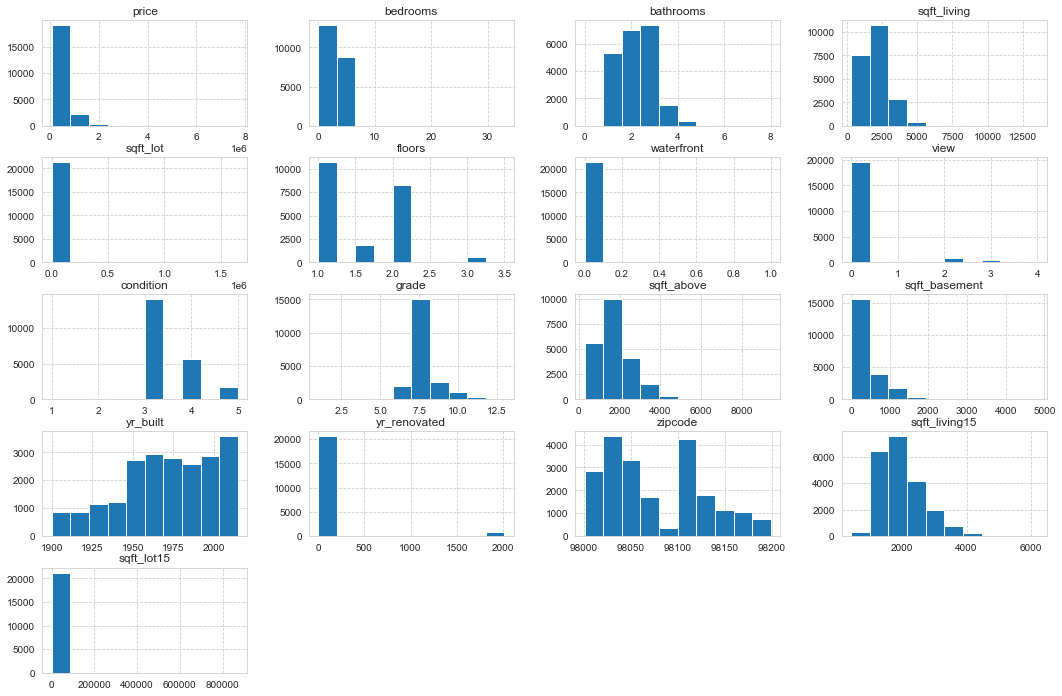

In [48]:
df.hist(figsize=(18, 12));

In [ ]:
Initial quantitative summary shows there some outlier potentials in most variables which needs further analysis. Seems that most of these variables have right skewed distribution.

In [90]:
df.corr().style.background_gradient(cmap ='viridis_r') 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,0.279885,-0.011269
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,0.713202,0.119248
sqft_above,0.605567,0.477600,0.685342,0.876597,0.183512,0.523885,0.167649,-0.158214,0.755923,1.000000,-0.051943,0.423898,0.023285,0.731870,0.194050


Based on correlation analysis for > 0.7:  

**price**  **sqft_living**.

**sqft_living** correlates with **bathrooms**, **grade**, **sqft_above**, **sqft_living15**




In [59]:
df.describe(include='category').T

,count,unique,top,freq
waterfront,21613,2,0,21450
zipcode,21613,70,98103,602


In [79]:
df.waterfront.value_counts()


0    21450
1      163
Name: waterfront, dtype: int64

In [83]:
df.zipcode.value_counts().sort_values()

98039     50
98148     57
98024     81
98010    100
98102    105
        ... 
98117    553
98052    574
98115    583
98038    590
98103    602
Name: zipcode, Length: 70, dtype: int64

Out of 21613 records, only 163 has waterfront.  
Highest occuring zip code is **98103** and least occuring is **98039** .

Categorical analysis shows that most ouses has no waterfront and the `zipcode` 98103 is the most occuring one in the dataframe. 